<a href="https://colab.research.google.com/github/bechosen-spec/Women-Football-Result-Prediction/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [141]:
df = pd.read_csv('/content/cleaned_results.csv')

In [142]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


In [143]:
df.corr()

<ipython-input-143-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,home_score,away_score,neutral
home_score,1.000000,-0.333133,0.003656
away_score,-0.333133,1.000000,-0.045386
neutral,0.003656,-0.045386,1.000000


In [144]:
df.count()

date          4884
home_team     4884
away_team     4884
home_score    4884
away_score    4884
tournament    4884
city          4884
country       4884
neutral       4884
dtype: int64

In [145]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [146]:
df['date'] = pd.to_datetime(df['date'])

In [147]:
df['year'] = df['date'].dt.year

In [148]:
df = df.drop('date', axis=1)

<ipython-input-149-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


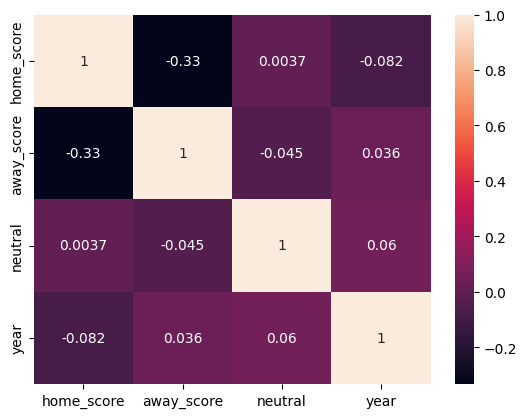

In [149]:
sns.heatmap(df.corr(), annot=True)
plt.show()

**Preprocessing the data**

In [150]:
X = df.drop(columns=["home_score", "away_score"])
y_home = df["home_score"]
y_away = df["away_score"]

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'X' is the feature matrix and 'y_home' and 'y_away' are the target variables
# Split the data into training and testing sets
# We are first training the home dataset as our target variable
X_train, X_test, y_train, y_test = train_test_split(X, y_home, test_size=0.2, random_state=42)

In [152]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Concatenate X_train and X_test
combined_data = pd.concat([X_train, X_test], axis=0)

# Encoding of the columns
for column in combined_data:
    combined_data[column] = encoder.fit_transform(combined_data[column])

# Split back into X_train and X_test
X_train = combined_data[:len(X_train)]
X_test = combined_data[len(X_train):]

print(X_train)
print(X_test)

      home_team  away_team  tournament  city  country  neutral  year
3567        187        143          24   311      149        0    40
679         187         35          16   349      134        1    19
2718        169        133          14   480       34        1    35
1730        156        130           4   225      124        0    28
2460        168         54          28   930       52        1    33
...         ...        ...         ...   ...      ...      ...   ...
4426        129        125          16   485       53        1    43
466         168        165          29   124      134        0    16
3092        129        153          14   639       34        1    37
3772         30        162           3  1022       24        0    40
860         166         54          29   857      132        0    20

[3907 rows x 7 columns]
      home_team  away_team  tournament  city  country  neutral  year
1149         90        159          29   393       70        0    23
393      

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(X_train)
normalised_train_df = pd.DataFrame(normalised_train_df,
columns=X_train.columns)
normalised_train_df = X_train

In [154]:
X_test = X_test.reset_index(drop=True)
normalised_test_df = scaler.transform(X_test)
normalised_test_df = pd.DataFrame(normalised_test_df,
columns=X_test.columns)
normalised_test_df = X_test

In [155]:
X_train.shape

(3907, 7)

In [156]:
X_test.shape

(977, 7)

In [157]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Training Different model and their Evaluations**

In [158]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [159]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SGDRegressor': SGDRegressor(),
    'DecissionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBRegressor':XGBRegressor(random_state=42),
    'catboost': CatBoostRegressor(random_state=42),
    'LGBMRegressor': LGBMRegressor(random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=42),
    'GradientBoostingRegressor':GradientBoostingRegressor(random_state=42)
}

In [160]:
def models_eval(models, X, y_home):
    rmse_train, rmse_val,r2, model_name = [], [], [],[]
    for name, model in models.items():
        model_name.append(name) #Saving the name of model
        model.fit(X,y_home) #Fitting model on training set
        y_pred = model.predict(X) #Making prediction on already seen data
        rmse = np.sqrt(mean_squared_error(y_home, y_pred)) #Evaluation on training set
        rmse_train.append(rmse)
        r2score = r2_score(y_home, y_pred) #Computing R2_score
        r2.append(r2score)
        # CrossValidation...
        scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
        rmse_scores = np.sqrt(-scores)
        rmse_val.append(rmse_scores.mean())
    # Create DataFrame for the models and their RMSE values
    eval_df = pd.DataFrame({'RMSE_Train_set':rmse_train, 'RMSE_Val':rmse_val, 'R2_Score':r2},index=model_name)
    return eval_df

In [161]:
eval_df = models_eval(models, X_train, y_train)

Learning rate set to 0.05078
0:	learn: 2.7338994	total: 1.9ms	remaining: 1.9s
1:	learn: 2.7260785	total: 3.54ms	remaining: 1.77s
2:	learn: 2.7178320	total: 4.78ms	remaining: 1.59s
3:	learn: 2.7103221	total: 6.14ms	remaining: 1.53s
4:	learn: 2.7037568	total: 7.45ms	remaining: 1.48s
5:	learn: 2.6958913	total: 8.54ms	remaining: 1.42s
6:	learn: 2.6914381	total: 9.4ms	remaining: 1.33s
7:	learn: 2.6843858	total: 10.7ms	remaining: 1.32s
8:	learn: 2.6804427	total: 11.9ms	remaining: 1.31s
9:	learn: 2.6752975	total: 13.3ms	remaining: 1.31s
10:	learn: 2.6681213	total: 14.6ms	remaining: 1.31s
11:	learn: 2.6618466	total: 16ms	remaining: 1.31s
12:	learn: 2.6548512	total: 17.2ms	remaining: 1.31s
13:	learn: 2.6482924	total: 18.4ms	remaining: 1.3s
14:	learn: 2.6441127	total: 20.8ms	remaining: 1.37s
15:	learn: 2.6394996	total: 22.6ms	remaining: 1.39s
16:	learn: 2.6341941	total: 23.9ms	remaining: 1.38s
17:	learn: 2.6295424	total: 25.3ms	remaining: 1.38s
18:	learn: 2.6246969	total: 26.6ms	remaining: 1.37s

In [162]:
eval_df

,RMSE_Train_set,RMSE_Val,R2_Score
LinearRegression,2.722655e+00,2.727220e+00,1.580887e-02
Ridge,2.722655e+00,2.727215e+00,1.580887e-02
Lasso,2.727739e+00,2.729453e+00,1.213045e-02
ElasticNet,2.725022e+00,2.727212e+00,1.409739e-02
SGDRegressor,1.421209e+14,9.419260e+13,-2.681697e+27
DecissionTree,1.284867e-01,3.460047e+00,9.978082e-01
RandomForest,9.308885e-01,2.537552e+00,8.849493e-01
XGBRegressor,9.378881e-01,2.431189e+00,8.832126e-01
catboost,1.567150e+00,2.402008e+00,6.739265e-01
LGBMRegressor,1.725406e+00,2.374436e+00,6.047458e-01


**Evaluating Away score model**

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'X' is the feature matrix and 'y_home' and 'y_away' are the target variables
# Split the data into training and testing sets
# We are first training the home dataset as our target variable
X_train, X_test, y_train, y_test = train_test_split(X, y_away, test_size=0.2, random_state=42)

In [164]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Concatenate X_train and X_test
combined_data = pd.concat([X_train, X_test], axis=0)

# Encoding of the columns
for column in combined_data:
    combined_data[column] = encoder.fit_transform(combined_data[column])

# Split back into X_train and X_test
X_train = combined_data[:len(X_train)]
X_test = combined_data[len(X_train):]

print(X_train)
print(X_test)

      home_team  away_team  tournament  city  country  neutral  year
3567        187        143          24   311      149        0    40
679         187         35          16   349      134        1    19
2718        169        133          14   480       34        1    35
1730        156        130           4   225      124        0    28
2460        168         54          28   930       52        1    33
...         ...        ...         ...   ...      ...      ...   ...
4426        129        125          16   485       53        1    43
466         168        165          29   124      134        0    16
3092        129        153          14   639       34        1    37
3772         30        162           3  1022       24        0    40
860         166         54          29   857      132        0    20

[3907 rows x 7 columns]
      home_team  away_team  tournament  city  country  neutral  year
1149         90        159          29   393       70        0    23
393      

In [165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_train_df = scaler.fit_transform(X_train)
normalised_train_df = pd.DataFrame(normalised_train_df,
columns=X_train.columns)
normalised_train_df = X_train

In [166]:
X_test = X_test.reset_index(drop=True)
normalised_test_df = scaler.transform(X_test)
normalised_test_df = pd.DataFrame(normalised_test_df,
columns=X_test.columns)
normalised_test_df = X_test

In [167]:
X_train.shape

(3907, 7)

In [168]:
X_test.shape

(977, 7)

In [169]:
y_train.shape

(3907,)

In [170]:
def models_eval1(models, X, y_away):
    rmse_train, rmse_val,r2, model_name = [], [], [],[]
    for name, model in models.items():
        model_name.append(name) #Saving the name of model
        model.fit(X,y_away) #Fitting model on training set
        y_pred = model.predict(X) #Making prediction on already seen data
        rmse = np.sqrt(mean_squared_error(y_home, y_pred)) #Evaluation on training set
        rmse_train.append(rmse)
        r2score = r2_score(y_away, y_pred) #Computing R2_score
        r2.append(r2score)
        # CrossValidation...
        scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=3)
        rmse_scores = np.sqrt(-scores)
        rmse_val.append(rmse_scores.mean())
    # Create DataFrame for the models and their RMSE values
    eval_df1 = pd.DataFrame({'RMSE_Train_set':rmse_train, 'RMSE_Val':rmse_val, 'R2_Score':r2},index=model_name)
    return eval_df1

In [ ]:
eval_df1 = models_eval(models, X_train, y_train)

In [172]:
eval_df1

,RMSE_Train_set,RMSE_Val,R2_Score
LinearRegression,1.976489e+00,1.983521e+00,3.962863e-03
Ridge,1.976489e+00,1.983520e+00,3.962861e-03
Lasso,1.978643e+00,1.982744e+00,1.790301e-03
ElasticNet,1.978412e+00,1.983324e+00,2.023210e-03
SGDRegressor,6.052464e+13,5.452417e+13,-9.340095e+26
DecissionTree,1.153666e-01,2.765434e+00,9.966065e-01
RandomForest,6.967014e-01,1.894895e+00,8.762400e-01
XGBRegressor,7.734480e-01,1.918130e+00,8.474722e-01
catboost,1.225966e+00,1.839952e+00,6.167838e-01
LGBMRegressor,1.351968e+00,1.821093e+00,5.339639e-01
